In [ ]:
from google.colab import files

# kaggle.json 파일 업로드
print("kaggle.json 파일을 업로드해주세요:")
uploaded = files.upload() # please get the 'kaggle.json' from 'kaggle' for loading data remotely.

kaggle.json 파일을 업로드해주세요:


Saving kaggle.json to kaggle.json


In [ ]:
import os

# API 키 디렉토리 생성 및 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 설정 확인
!kaggle config view

Configuration values from /root/.kaggle
- username: jiwonjiwonjung
- path: None
- proxy: None
- competition: None


In [ ]:
!pip install kaggle

# 데이터셋 다운로드
!kaggle datasets download -d mahdinavaei/cat-and-dog-classifier

# 압축 해제
!unzip cat-and-dog-classifier.zip

Dataset URL: https://www.kaggle.com/datasets/mahdinavaei/cat-and-dog-classifier
License(s): unknown
  0% 0.00/126M [00:00<?, ?B/s]
100% 126M/126M [00:00<00:00, 1.34GB/s]
Archive:  cat-and-dog-classifier.zip
  inflating: data/Cat/000122_ZV_SCSW_HeroImages_1900x1024_D1.jpg  
  inflating: data/Cat/00tb-cats1-videoSixteenByNine3000.jpg  
  inflating: data/Cat/07CAT-STRIPES-superJumbo.jpg  
  inflating: data/Cat/1169131-two-cats-outside-banner_990x350.jpg  
  inflating: data/Cat/1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg  
  inflating: data/Cat/1200px-Cat03.jpg  
  inflating: data/Cat/1200px-RedCat_8727.jpg  
  inflating: data/Cat/1521-WIRED-Cat.jpeg  
  inflating: data/Cat/1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg  
  inflating: data/Cat/1_5978274.jpg  
  inflating: data/Cat/2.jpg          
  inflating: data/Cat/20190805_2T7A3552_Anne_Savage-scaled.jpg  
  inflating: data/Cat/2022by-lawcampaign.jpg  
  inflating: data/Cat/220726-cat-theo-elise-ew-636p-6cd3b0.jpg  
 

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import imghdr

%matplotlib inline

<ipython-input-4-c4163f5b6e23>:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data', labels='inferred')

Found 1152 files belonging to 2 classes.


In [ ]:
data.as_numpy_iterator().next()

(array([[[[232.03711   , 231.03711   , 226.03711   ],
          [233.        , 232.        , 227.        ],
          [233.18555   , 232.18555   , 227.18555   ],
          ...,
          [242.18555   , 239.18555   , 232.18555   ],
          [242.        , 239.        , 232.        ],
          [242.        , 239.        , 232.        ]],
 
         [[232.03711   , 231.03711   , 226.03711   ],
          [233.        , 232.        , 227.        ],
          [233.18555   , 232.18555   , 227.18555   ],
          ...,
          [242.18555   , 239.18555   , 232.18555   ],
          [242.        , 239.        , 232.        ],
          [242.        , 239.        , 232.        ]],
 
         [[232.03711   , 231.03711   , 226.03711   ],
          [233.        , 232.        , 227.        ],
          [233.18555   , 232.18555   , 227.18555   ],
          ...,
          [242.18555   , 239.18555   , 232.18555   ],
          [242.        , 239.        , 232.        ],
          [242.        , 239.  

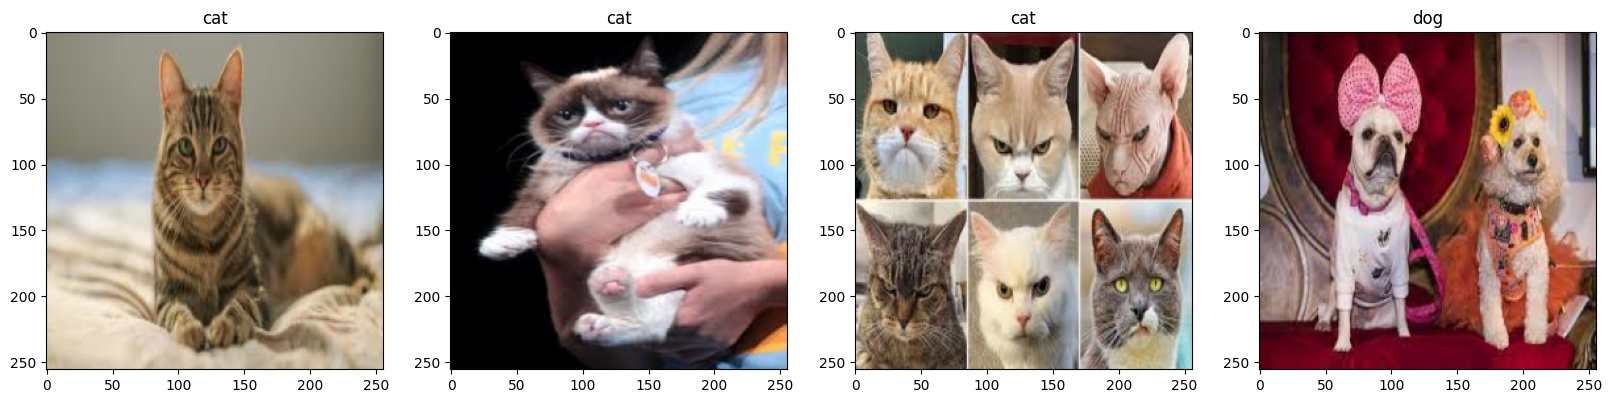

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
names = {1: 'dog', 0:'cat'}
imgs, labels = data.as_numpy_iterator().next()
imgs = imgs[:4]
labels= labels[:4]

for idx, (img, label) in enumerate(zip(imgs, labels)):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(names[label])

In [ ]:
data = data.map(lambda x, y: (x/255, y)) # 사진이랑 레이블을 받아옴
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

25

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
model = Sequential([
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=SGD(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# EarlyStopping 콜백 추가
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
## SGD

hist = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.4804 - loss: 6.0263 - val_accuracy: 0.4509 - val_loss: 9.2661
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.4759 - loss: 7.8485 - val_accuracy: 0.4911 - val_loss: 7.0160
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.4869 - loss: 7.1147 - val_accuracy: 0.5491 - val_loss: 2.0038
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.5068 - loss: 6.0333 - val_accuracy: 0.5312 - val_loss: 2.8677
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.5796 - loss: 4.5428 - val_accuracy: 0.5312 - val_loss: 5.7051
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.5056 - loss: 5.7931 - val_accuracy: 0.6429 - val_loss: 1.5024
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.5007 - loss: 5.6132 - val_accuracy: 0.5179 - val_loss: 5.1137
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.5232 - loss: 5.5998 - val_accuracy: 

In [ ]:
# 1.5 TFLite로 변환
def convert_to_tflite(model, filename='logistic.tflite'):
    # TFLite 변환기 생성
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # 양자화 적용 (모바일 기기에서 더 효율적으로 실행하기 위해)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # 변환 실행
    tflite_model = converter.convert()

    # 파일로 저장
    with open(filename, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite 모델이 {filename}에 저장되었습니다.")
    return filename

In [ ]:
# 1.5 TFLite로 변환
def convert_to_tflite(model, filename='logistic_optim.tflite'):
    # TFLite 변환기 생성
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # 양자화 적용 (모바일 기기에서 더 효율적으로 실행하기 위해)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # 변환 실행
    tflite_model = converter.convert()

    # 파일로 저장
    with open(filename, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite 모델이 {filename}에 저장되었습니다.")
    return filename

In [ ]:
filename = convert_to_tflite(model)

Saved artifact at '/tmp/tmp7iqdc4hl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140643003002768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140643003004688: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite 모델이 logistic.tflite에 저장되었습니다.
